In [371]:
from importlib import reload
import datetime

import to_lexicon as lex
reload(lex)

import base_words
reload(base_words)
from base_words import *

In [373]:
path = "./NYT-OPINION2016-2017-processed"

start = datetime.datetime(2016, 6, 1)
end = datetime.datetime(2017, 7, 1)

articles = lex.get_articles_from_filepath(path, start, end)

print ("finished grabbing articles")

left_collocations = lex.get_collocations(articles, LEFT_WORDS, RIGHT_WORDS)
right_collocations = lex.get_collocations(articles, RIGHT_WORDS, LEFT_WORDS)

finished grabbing articles


In [374]:
# print (left_collocations[:500])
print (len(left_collocations))
print (len(right_collocations))

209324
589719


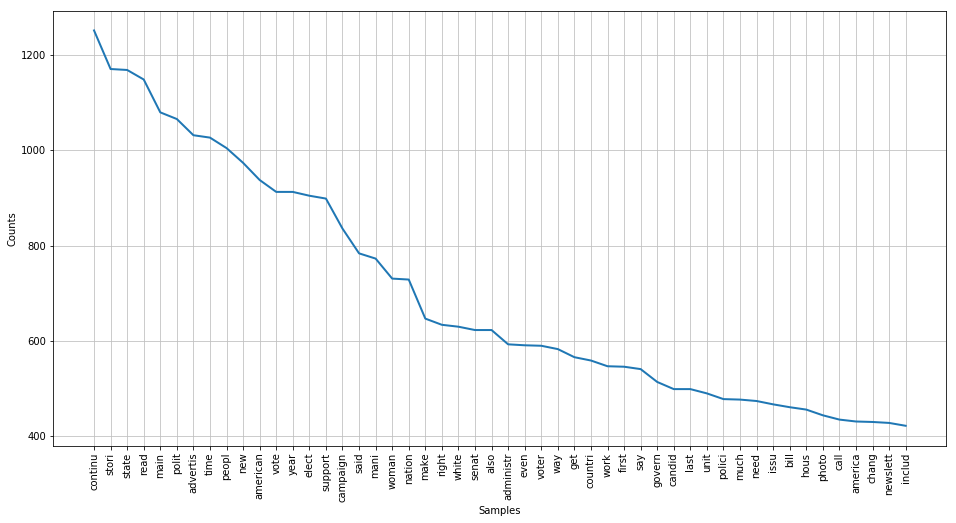

In [375]:
import matplotlib.pyplot as plt 
import nltk

def word_distributions(words):
    freqdist = nltk.FreqDist(words)
    plt.figure(figsize=(16,8))
    freqdist.plot(50)
    plt.show()
    
word_distributions(left_collocations)
### evaluating collocates

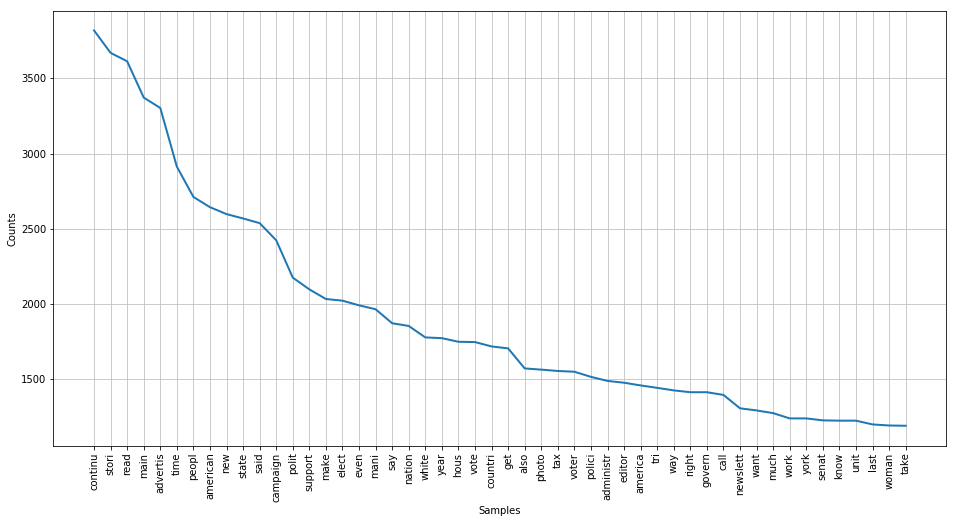

In [376]:
word_distributions(right_collocations)

In [377]:
from collections import Counter
from nltk import ngrams

ngram_counts = Counter(ngrams(left_collocations, 1))
ngram_counts.most_common(50)

[(('continu',), 1252),
 (('stori',), 1171),
 (('state',), 1169),
 (('read',), 1149),
 (('main',), 1080),
 (('polit',), 1066),
 (('advertis',), 1032),
 (('time',), 1027),
 (('peopl',), 1005),
 (('new',), 974),
 (('american',), 938),
 (('vote',), 913),
 (('year',), 913),
 (('elect',), 905),
 (('support',), 899),
 (('campaign',), 836),
 (('said',), 784),
 (('mani',), 773),
 (('woman',), 731),
 (('nation',), 729),
 (('make',), 647),
 (('right',), 634),
 (('white',), 630),
 (('senat',), 623),
 (('also',), 623),
 (('administr',), 593),
 (('even',), 591),
 (('voter',), 590),
 (('way',), 583),
 (('get',), 566),
 (('countri',), 559),
 (('work',), 547),
 (('first',), 546),
 (('say',), 541),
 (('govern',), 514),
 (('candid',), 499),
 (('last',), 499),
 (('unit',), 490),
 (('polici',), 478),
 (('much',), 477),
 (('need',), 474),
 (('issu',), 467),
 (('bill',), 461),
 (('hous',), 456),
 (('photo',), 444),
 (('call',), 435),
 (('america',), 431),
 (('chang',), 430),
 (('newslett',), 428),
 (('includ

In [378]:
from collections import Counter
from nltk import ngrams

ngram_counts = Counter(ngrams(right_collocations, 1))
l = ngram_counts.most_common()
print (len(l))
ngram_counts.most_common(50)

16627


[(('continu',), 3818),
 (('stori',), 3669),
 (('read',), 3613),
 (('main',), 3372),
 (('advertis',), 3303),
 (('time',), 2913),
 (('peopl',), 2712),
 (('american',), 2644),
 (('new',), 2598),
 (('state',), 2569),
 (('said',), 2538),
 (('campaign',), 2424),
 (('polit',), 2176),
 (('support',), 2098),
 (('make',), 2034),
 (('elect',), 2023),
 (('even',), 1992),
 (('mani',), 1966),
 (('say',), 1873),
 (('nation',), 1855),
 (('white',), 1779),
 (('year',), 1774),
 (('hous',), 1750),
 (('vote',), 1748),
 (('countri',), 1719),
 (('get',), 1706),
 (('also',), 1573),
 (('photo',), 1565),
 (('tax',), 1556),
 (('voter',), 1551),
 (('polici',), 1517),
 (('administr',), 1490),
 (('editor',), 1478),
 (('america',), 1460),
 (('tri',), 1444),
 (('way',), 1427),
 (('right',), 1415),
 (('govern',), 1415),
 (('call',), 1397),
 (('newslett',), 1308),
 (('want',), 1294),
 (('much',), 1276),
 (('work',), 1241),
 (('york',), 1241),
 (('senat',), 1228),
 (('know',), 1226),
 (('unit',), 1226),
 (('last',), 12

799043


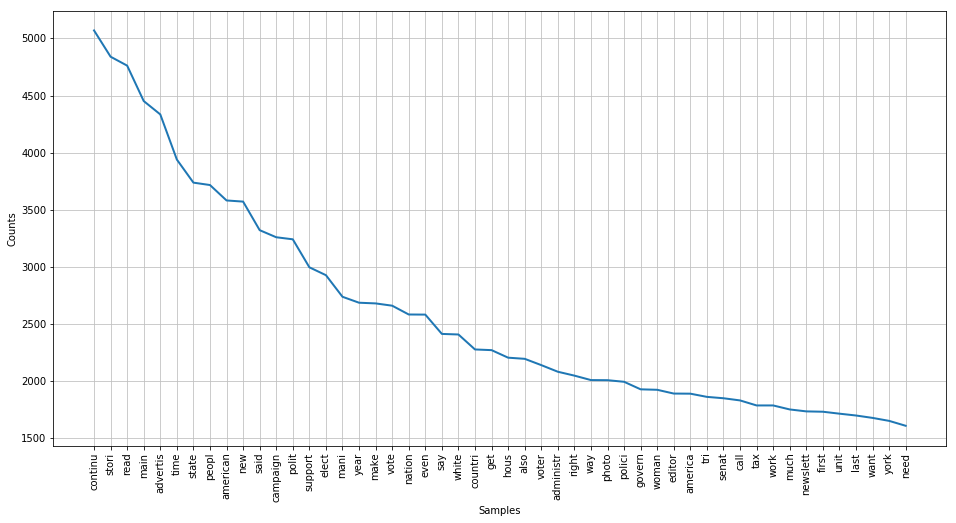

In [379]:
# rate by semantic positivity, and then see proportion of dem/rep associated with each one?

all_words = left_collocations + right_collocations
print (len(all_words))

ngram_counts = Counter(ngrams(all_words, 1))
all_wc = [tup[0][0] for tup in ngram_counts.most_common()]

word_distributions(all_words)

In [382]:
from collections import defaultdict

left_usage = defaultdict(lambda: 0)
for word in left_collocations:
    left_usage[word] += 1
      
right_usage = defaultdict(lambda: 0)
for word in right_collocations:
    right_usage[word] += 1

In [383]:
words = all_wc[:50]

y_left = []
y_right = []

for word in words:
    y_left.append(left_usage[word])
    y_right.append(right_usage[word])

50
50


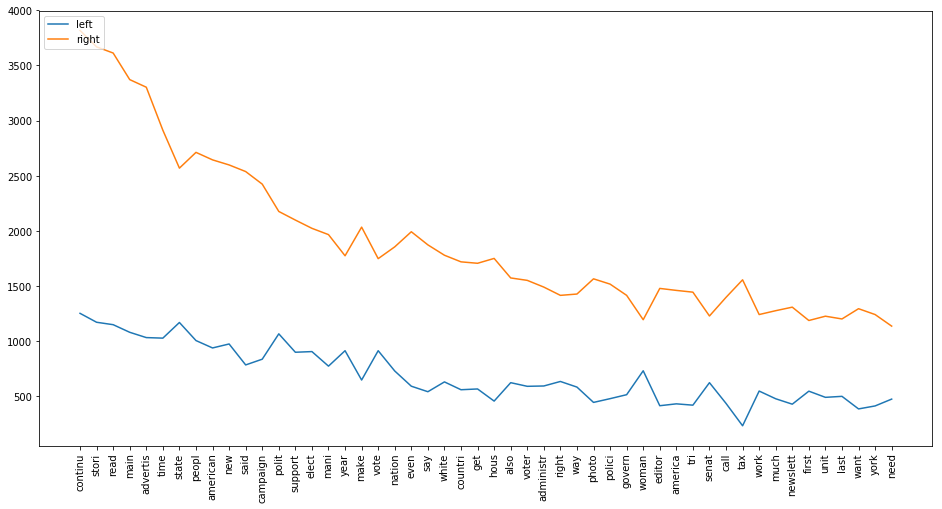

In [384]:
print (len(words))
print (len(y_right))

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)

plt.plot(words, y_left)
plt.plot(words, y_right)

plt.legend(['left', 'right'], loc='upper left')
plt.show()

# use different graph for this


209324 589719
0.0011083296707496513 0
0.0026385447984548574 0.0026385447984548574
6487 10032
left_collocations is more unique, by 0.015123743293158964


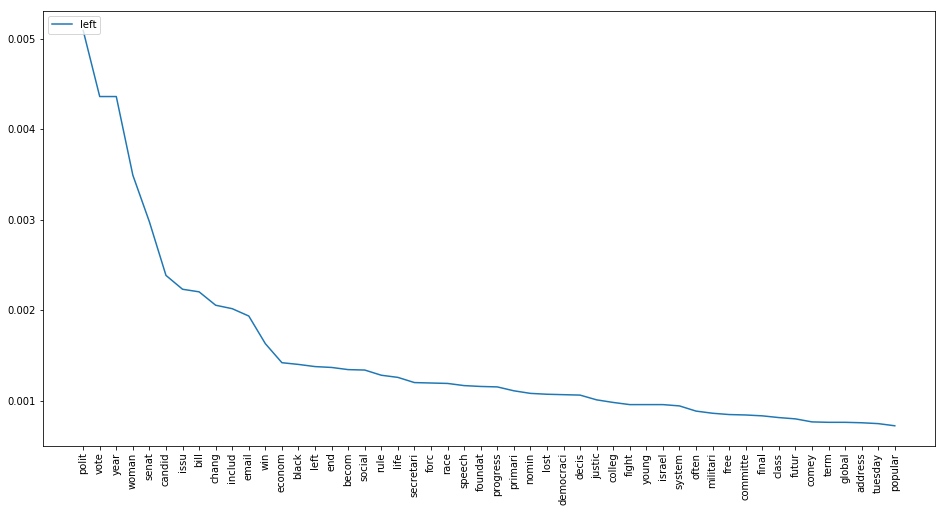

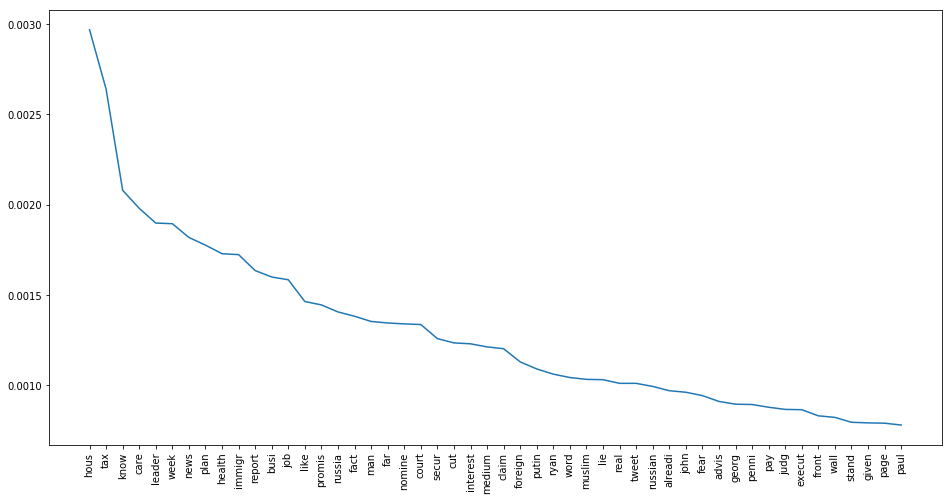

polit vote year woman senat candid issu bill chang includ email win econom black left end becom social rule life secretari forc race speech foundat progress primari nomin lost democraci decis justic colleg fight young israel system often militari free committe final class futur comey term global address tuesday popular
hous tax know care leader week news plan health immigr report busi job like promis russia fact man far nomine court secur cut interest medium claim foreign putin ryan word muslim lie real tweet russian alreadi john fear advis georg penni pay judg execut front wall stand given page paul


In [396]:
#### showing overlap ###
from collections import defaultdict


def get_counts(group):
    total = 0
    counts = defaultdict(lambda: 0)
    for word in group:
        counts[word] += 1
        total+=1
    ratios = defaultdict(lambda: 0)
    for word,count in counts.items():
        ratios[word] = float(count)/total
    return counts, ratios
        

def overlap(group1, group2):    
    group1_counts, group1_ratios = get_counts(group1)
    group2_counts, group2_ratios = get_counts(group2)
    
    THRESHOLD = .3
        
    overlap = []
    
    set1 = defaultdict(lambda: 0)
    for word, ratio in group1_ratios.items():
        if ratio > (group2_ratios[word] + (group2_ratios[word] * THRESHOLD)):
            set1[word] = ratio#-group2_ratios[word]
        
    set2 = defaultdict(lambda: 0)
    for word, ratio in group2_ratios.items():
        if ratio > (group1_ratios[word] + (group1_ratios[word] * THRESHOLD)):
            set2[word] = ratio#-group1_ratios[word]
    
    print (len(set1), len(set2))
    
#     print ("HERE", group1_weights["new"], group2_weights["new"])
    
    # sanity check
#     for word in group1:
#         print ("{}+{}={} shoudl be {}".format(overlaps[word], group1_unique[word], overlaps[word]+ group1_unique[word], group1_usage[word]))
#         assert (overlaps[word] + group1_unique[word] == group1_usage[word])
        
#     for word in group2:
#         assert (overlaps[word] + group2_unique[word] == group2_usage[word])
    
    return set1, set2


sample1 = left_collocations
sample2 = right_collocations

# print (len(sample1),len(sample2))

# sample1 = ["new","new","new","new","this","diff","how"]
# sample2 = ["new","new","new","new","new","a","c"]

left_set, right_set = overlap(sample1, sample2)
    
# num_overlaps = sum(overlaps.values())
num_left_unique = sum(left_set.values())
num_right_unique = sum(right_set.values())

print (num_left_unique)
print (num_right_unique)

if num_left_unique > num_right_unique:
    print ("{} is more unique, by {}".format("left_collocations",num_left_unique - num_right_unique))
else:
    print ("{} is more unique, by {}".format("right_collocations",num_right_unique - num_left_unique))

sorted_left_unique = sorted([(k,v) for k,v in left_set.items() if v>0],key=lambda x:x[1],reverse=True)
sorted_right_unique = sorted([(k,v) for k,v in right_set.items() if v>0],key=lambda x:x[1],reverse=True)

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)

plt.plot([tup[0] for tup in sorted_left_unique[:50]], [tup[1] for tup in sorted_left_unique[:50]])
# plt.plot(sorted_left_unique.keys()[:50], sorted_left_unique.values()[:50])

plt.legend(['left', 'right'], loc='upper left')
plt.show()

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.plot([tup[0] for tup in sorted_right_unique[:50]], [tup[1] for tup in sorted_right_unique[:50]])
plt.show()

top_left = [tup[0] for tup in sorted_left_unique[:50]]
print ((" ").join(top_left))
top_right = [tup[0] for tup in sorted_right_unique[:50]]
print ((" ").join(top_right))

In [389]:
m_collocations = lex.get_collocations(articles, MALE_WORDS, FEMALE_WORDS)
f_collocations = lex.get_collocations(articles, FEMALE_WORDS, MALE_WORDS)

In [390]:
# print (left_collocations[:500])
print (len(m_collocations))
print (len(f_collocations))

90835
114107


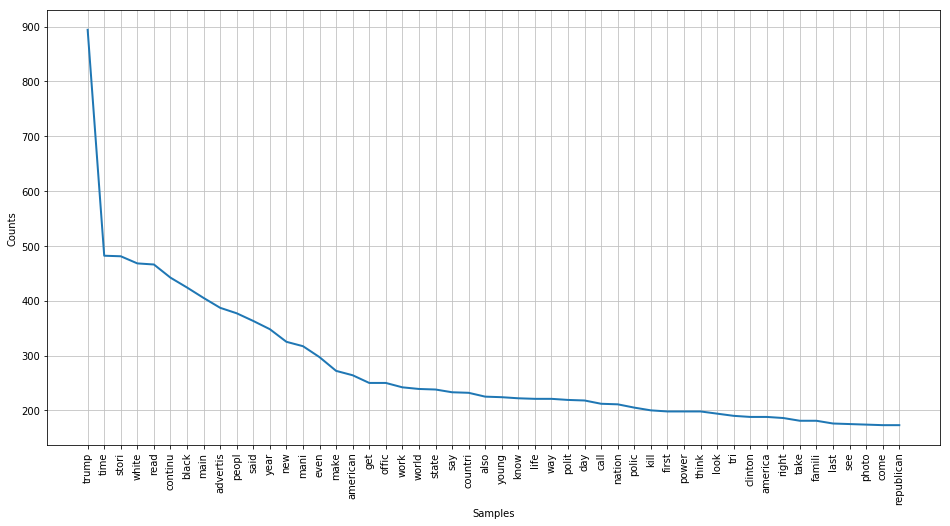

In [397]:
import matplotlib.pyplot as plt 
import nltk

def word_distributions(words):
    freqdist = nltk.FreqDist(words)
    plt.figure(figsize=(16,8))
    freqdist.plot(50)
    plt.show()
    
word_distributions(m_collocations)
### evaluating collocates

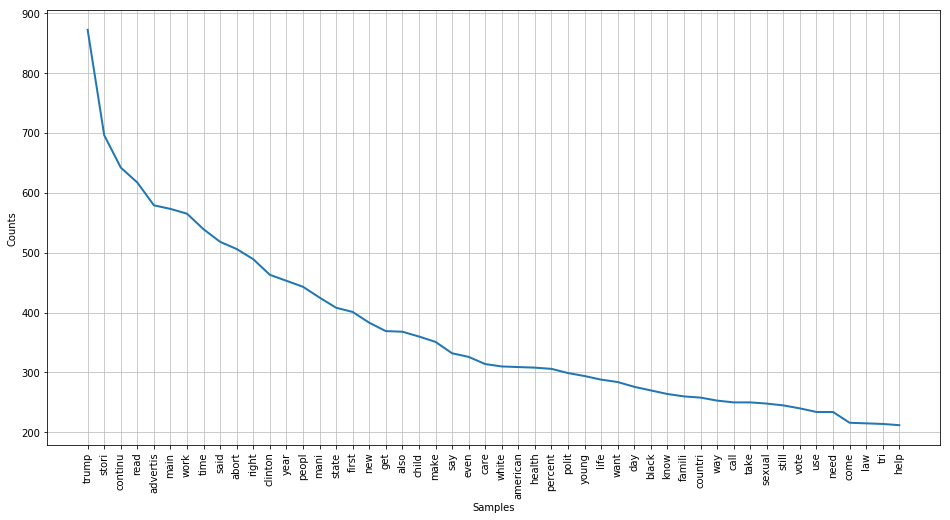

In [398]:
word_distributions(f_collocations)

0.0004183409478725161 0.0004183409478725161
0.0002892022400028044 0
6245 5766
0.3923597732151451
0.4068374420500421
f_collocations is more unique, by 0.014477668834896984


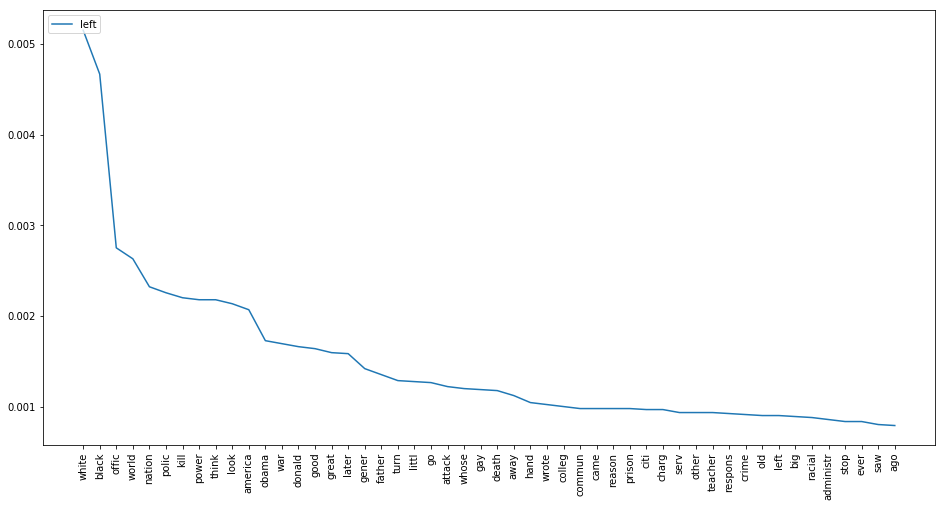

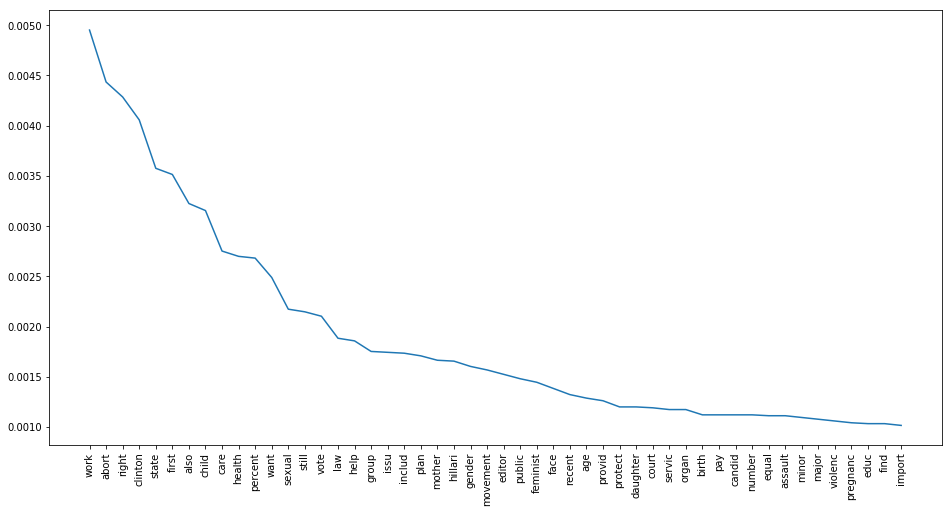

white black offic world nation polic kill power think look america obama war donald good great later gener father turn littl go attack whose gay death away hand wrote colleg commun came reason prison citi charg serv other teacher respons crime old left big racial administr stop ever saw ago
work abort right clinton state first also child care health percent want sexual still vote law help group issu includ plan mother hillari gender movement editor public feminist face recent age provid protect daughter court servic organ birth pay candid number equal assault minor major violenc pregnanc educ find import


In [393]:
#### showing overlap ###
sample1 = m_collocations
sample2 = f_collocations



m_unique, f_unique = overlap(sample1, sample2)
    
num_m_unique = sum(m_unique.values())
num_f_unique = sum(f_unique.values())


print (num_m_unique)
print (num_f_unique)

if num_m_unique > num_f_unique:
    print ("{} is more unique, by {}".format("m_collocations",num_m_unique - num_f_unique))
else:
    print ("{} is more unique, by {}".format("f_collocations",num_f_unique - num_m_unique))

# print ("{}, or {} out of {}, are overlaps in {}".format(float(num_overlaps)/len(sample1), num_overlaps, len(sample1), "male_collocations"))
# print ("")
# print ("{}, or {} out of {}, are overlaps in {}".format(float(num_overlaps)/len(sample2), num_overlaps, len(sample2), "female_collocations"))

sorted_m_unique = sorted([(k,v) for k,v in m_unique.items() if v>0],key=lambda x:x[1],reverse=True)
sorted_f_unique = sorted([(k,v) for k,v in f_unique.items() if v>0],key=lambda x:x[1],reverse=True)

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)

plt.plot([tup[0] for tup in sorted_m_unique[:50]], [tup[1] for tup in sorted_m_unique[:50]])
# plt.plot(sorted_left_unique.keys()[:50], sorted_left_unique.values()[:50])

plt.legend(['left', 'right'], loc='upper left')
plt.show()

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.plot([tup[0] for tup in sorted_f_unique[:50]], [tup[1] for tup in sorted_f_unique[:50]])
plt.show()

top_m = [tup[0] for tup in sorted_m_unique[:50]]
print ((" ").join(top_m))
top_f = [tup[0] for tup in sorted_f_unique[:50]]
print ((" ").join(top_f))

In [ ]:
w_collocations = lex.get_collocations(articles, WHITE_WORDS, MINORITY_WORDS, exclude=WHITE_WORDS_EXCLUDE)
b_collocations = lex.get_collocations(articles, MINORITY_WORDS, WHITE_WORDS)

In [367]:
# print (left_collocations[:500])
print (len(w_collocations))
print (len(b_collocations))

1004
3020


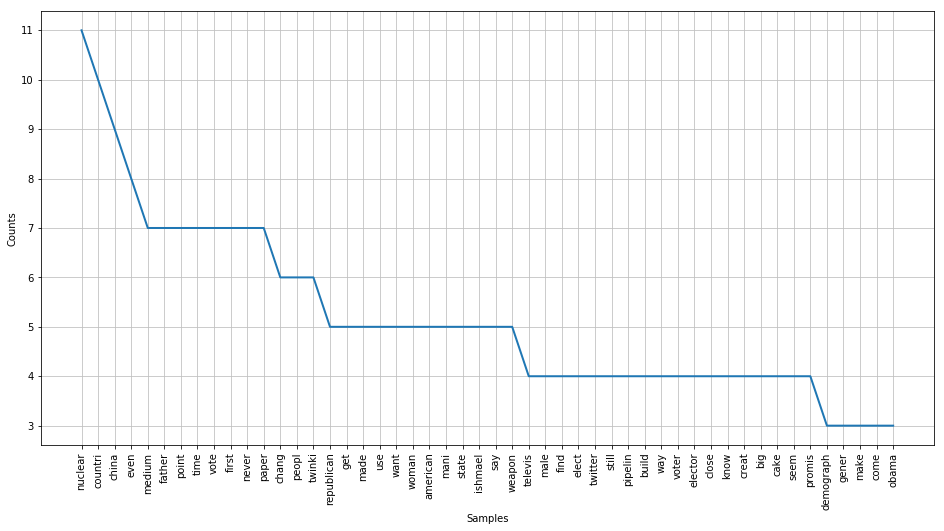

In [368]:
import matplotlib.pyplot as plt 
import nltk

def word_distributions(words):
    freqdist = nltk.FreqDist(words)
    plt.figure(figsize=(16,8))
    freqdist.plot(50)
    plt.show()
    
word_distributions(w_collocations)
### evaluating collocates

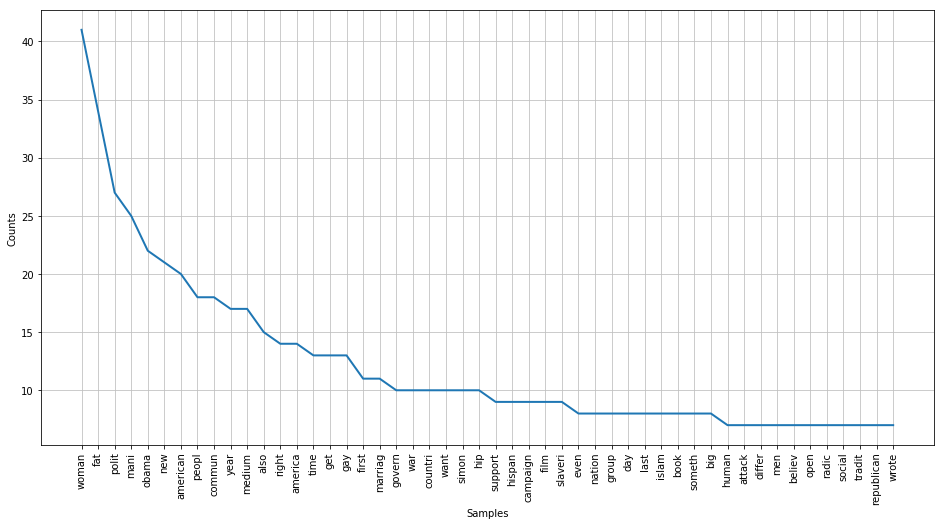

In [369]:
word_distributions(b_collocations)

0 0
0 0
542 1130
w_collocations is more unique, by 0.10530988628267035


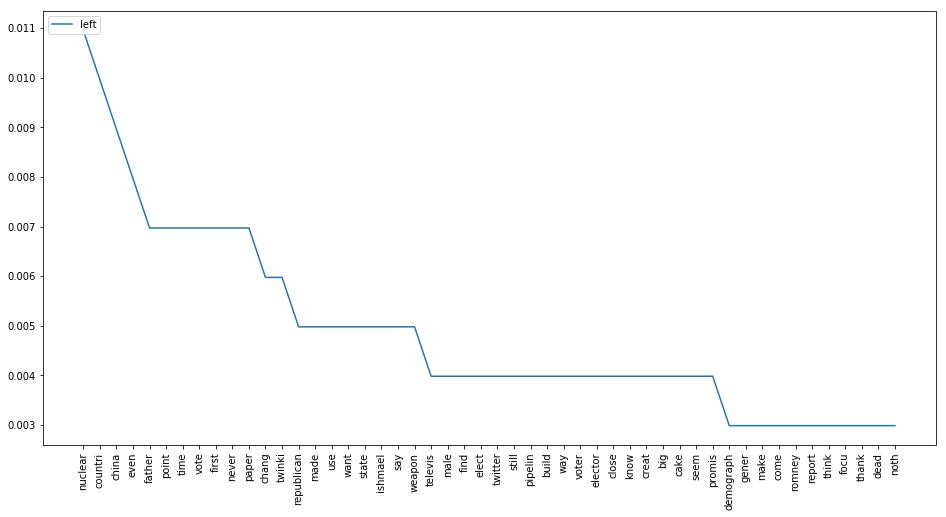

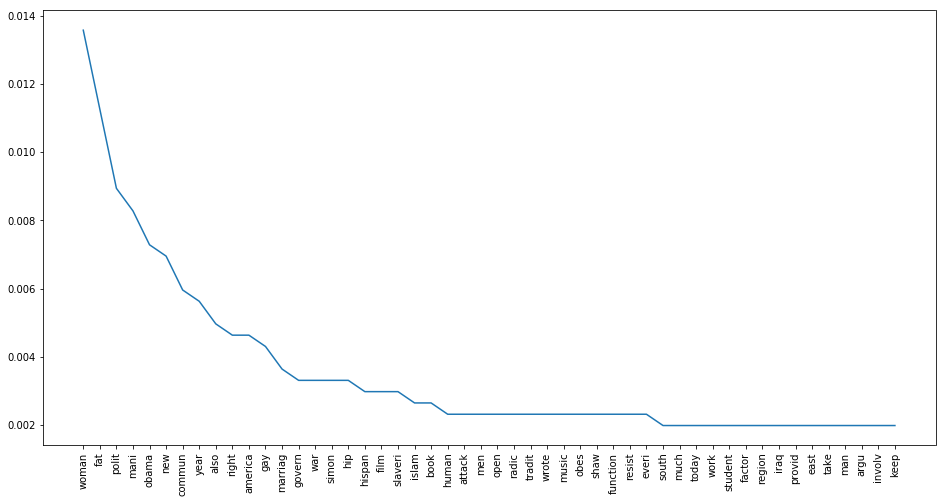

nuclear countri china even father point time vote first never paper chang twinki republican made use want state ishmael say weapon televis male find elect twitter still pipelin build way voter elector close know creat big cake seem promis demograph gener make come romney report think focu thank dead noth
obama abort white nichola kristof american year right magazin medium polit fat health militari make new help african romney hispan educ say care talk smartphon reader america child like campaign rate last place expand husband thought social faster fight poverti submit photograph illustr empower blog gender today yet smart democrat


In [370]:
#### showing overlap ###
sample1 = w_collocations
sample2 = b_collocations

w_unique, b_unique = overlap(sample1, sample2)
    
num_w_unique = sum(w_unique.values())
num_b_unique = sum(b_unique.values())

if num_w_unique > num_b_unique:
    print ("{} is more unique, by {}".format("w_collocations",num_w_unique - num_b_unique))
else:
    print ("{} is more unique, by {}".format("b_collocations",num_b_unique - num_w_unique))
    
# print ("{}, or {} out of {}, are overlaps in {}".format(float(num_overlaps)/len(sample1), num_overlaps, len(sample1), "white_collocations"))
# print ("")
# print ("{}, or {} out of {}, are overlaps in {}".format(float(num_overlaps)/len(sample2), num_overlaps, len(sample2), "black_collocations"))

sorted_w_unique = sorted([(k,v) for k,v in w_unique.items() if v>0],key=lambda x:x[1],reverse=True)
sorted_b_unique = sorted([(k,v) for k,v in b_unique.items() if v>0],key=lambda x:x[1],reverse=True)


plt.figure(figsize=(16,8))
plt.xticks(rotation=90)


plt.plot([tup[0] for tup in sorted_w_unique[:50]], [tup[1] for tup in sorted_w_unique[:50]])
# plt.plot(sorted_left_unique.keys()[:50], sorted_left_unique.values()[:50])

plt.legend(['left', 'right'], loc='upper left')
plt.show()

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.plot([tup[0] for tup in sorted_b_unique[:50]], [tup[1] for tup in sorted_b_unique[:50]])
plt.show()

top_w = [tup[0] for tup in sorted_w_unique[:50]]
print ((" ").join(top_w))
top_b = [tup[0] for tup in sorted_b_unique[:50]]
print ((" ").join(top_f))

In [349]:
from nltk import tokenize
import gensim

# docs = []
# for article in articles:
#     title, date_publish, text = article.title, article.date_publish, article.text
#     words = lex.text_cleanup(text,filter_support=True)
#     docs.append(words)

# word2vec trained on *all* documents -- to see larger context. 
docs = []
for article in articles:
    title, date_publish, text = article.title, article.date_publish, article.text
    sentences = tokenize.sent_tokenize(text)
    sentences = [gensim.utils.simple_preprocess(s) for s in sentences] 
    docs += sentences

In [350]:
model = gensim.models.Word2Vec(
    docs,
    size=150,
    window=15,
    min_count=1,
    workers=10)

model.train(docs, total_examples=len(docs), epochs=10)

(1273995, 1591400)

In [351]:
model.wv.most_similar(positive="obama",topn=20)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('romney', 0.9420984387397766),
 ('watered', 0.8989618420600891),
 ('mitt', 0.8988908529281616),
 ('mr', 0.8805540800094604),
 ('underscore', 0.8738191723823547),
 ('myanmar', 0.8671086430549622),
 ('president', 0.8653607368469238),
 ('deliberate', 0.8613530993461609),
 ('presidency', 0.8599632382392883),
 ('inaugural', 0.8569321036338806),
 ('blaming', 0.856155514717102),
 ('obstructionism', 0.8551409840583801),
 ('burgeoning', 0.8508641123771667),
 ('bush', 0.8506802320480347),
 ('appraisals', 0.850114107131958),
 ('laughs', 0.8475710153579712),
 ('preferred', 0.8419610857963562),
 ('barack', 0.8416026830673218),
 ('existed', 0.8411595821380615),
 ('term', 0.8407705426216125)]

In [352]:
model.wv.similarity(w1="green",w2="lesbian")

0.4680747

In [359]:
print (top_left)
import numpy as np

def calculate_density(wlst):
    sims = []
    unfound = set([])
    for i in range(len(wlst)):
        for j in range(i+1,len(wlst)):
            w1=wlst[i][0]
            w2=wlst[j][0]
            try:
                sim = model.wv.similarity(w1=w1, w2=w2)
                sims.append(sim*wlst[i][1]*wlst[j][1])
            except:
                unfound.add(w2)
    return np.mean(np.array(sims))

# higher score = higher similarity among words
 
lc, lr = get_counts(left_collocations)
rc, rr = get_counts(right_collocations)

sorted_left_unique = sorted([(k,v) for k,v in lc.items() if v>0],key=lambda x:x[1],reverse=True)
sorted_right_unique = sorted([(k,v) for k,v in rc.items() if v>0],key=lambda x:x[1],reverse=True)

# print(sorted_left_unique[:500])

print (calculate_density(sorted_left_unique[:500]))
print (calculate_density(sorted_right_unique[:500]))

#             print ("{} - {}: {}".format(w1,w2,sim))

['state', 'vote', 'american', 'poll', 'woman', 'way', 'year', 'time', 'first', 'number', 'also', 'mani', 'last', 'got', 'care', 'day', 'seem', 'help', 'unit', 'medium', 'suggest', 'america', 'term', 'famili', 'good', 'administr', 'bill', 'public', 'line', 'point', 'man', 'health', 'joe', 'show', 'control', 'kill', 'anoth', 'report', 'power', 'job', 'came', 'choic', 'race', 'everi', 'result', 'israel', 'includ', 'serv', 'forc', 'fact']
103.4318572527141
145.14518816847462


In [360]:
mc, mr = get_counts(m_collocations)
fc, fr = get_counts(f_collocations)

sorted_m_unique = sorted([(k,v) for k,v in mc.items() if v>0],key=lambda x:x[1],reverse=True)
sorted_f_unique = sorted([(k,v) for k,v in fc.items() if v>0],key=lambda x:x[1],reverse=True)

print (calculate_density(sorted_m_unique[:500]))
print (calculate_density(sorted_f_unique[:500]))

14.372788545250303
28.26473330660014


In [361]:
wc, wr = get_counts(w_collocations)
bc, br = get_counts(b_collocations)

sorted_w_unique = sorted([(k,v) for k,v in wc.items() if v>0],key=lambda x:x[1],reverse=True)
sorted_b_unique = sorted([(k,v) for k,v in bc.items() if v>0],key=lambda x:x[1],reverse=True)

print (calculate_density(sorted_w_unique[:500]))
print (calculate_density(sorted_b_unique[:500]))

2.637735810534571
14.137905350956446


In [ ]:
5.462833577919492
15.088075913336812

1.3960541647957474
9.28654499235206

'invit'